### Разностная схема (верхний уголок)

\begin{equation}
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = e^{u^2}
\end{equation}

#### Функции

In [1]:
function u_init(x)
    return -x + 1
end

u_init (generic function with 1 method)

In [2]:
function u_left(t)
    return exp(-t)
end

u_left (generic function with 1 method)

In [3]:
function f(x, t)
    return 0
end

f (generic function with 1 method)

In [4]:
# Функции для метода ньютона
function f_newton(z, u1, u2, tau, h)
    return (z[1] - u1) / tau + z[1] * (z[1] - u2) / h - exp(z[1] ^ 2)
end

function f_partial_newton(z, u2, tau, h)
    return 1 / tau + (2 * z[1] - u2) / h - 2 * z[1] * exp(z[1] ^ 2)
end

f_partial_newton (generic function with 1 method)

#### Задание переменных и начальных параметров

In [5]:
# Начальные значения
a = 0
b = 1
t_0 = 0
T = 0.3

0.3

In [6]:
# Число узлов
N = 200
M = 300

300

In [7]:
# Cетка
t = LinRange(t_0, T, M + 1)
x = LinRange(a, b, N + 1);

In [8]:
# Размер шага сетки
h = (b - a) / N
tau = (T - t_0) / M

0.001

In [9]:
# Инициализация начальных значений
u = zeros(M + 1, N + 1);
u[1, :] = u_init.(x)
u[2:M + 1, 1] = u_left.(t[2:M + 1]);

#### Решение и визуализация

In [10]:
using NLsolve

In [52]:
function f(x)
    return x[1] ^ 2 - 1
end

function f_der(x)
    return 2 * x[1]
end

sol = nlsolve(f, f_der, [0.5])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.5]
 * Zero: [1.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 1
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 2
 * Jacobian Calls (df/dx): 2

In [73]:
using ProgressBars

In [15]:
for i in tqdm_notebook(1:10)
    sleep(1)
end

LoadError: UndefVarError: tqdm_notebook not defined

In [16]:
# Решение с испоьлзованием разностной схемы
for m in tqdm(1:M)
    for n in 2:(N + 1)
        f(z) = f_newton(z, u[m, n], u[m + 1, n - 1], tau, h)
        f_partial(z) = f_partial_newton(z, u[m + 1, n - 1], tau, h)
        solution = nlsolve(f, f_partial, [u[m + 1, n - 1]], iterations=100)
        u[m + 1, n] = solution.zero[1]
    end
end

0.0%┣                                             ┫ 0/300 [00:00<00:-15, -0s/it]
0.3%┣▏                                         ┫ 1/300 [00:10<Inf:Inf, InfGs/it]
0.7%┣▎                                          ┫ 2/300 [00:14<01:07:13, 14s/it]
1.0%┣▌                                              ┫ 3/300 [00:17<42:33, 9s/it]
1.3%┣▋                                              ┫ 4/300 [00:20<33:21, 7s/it]
1.7%┣▉                                              ┫ 5/300 [00:24<28:54, 6s/it]
2.0%┣█                                              ┫ 6/300 [00:27<26:47, 5s/it]
2.3%┣█                                              ┫ 7/300 [00:30<24:47, 5s/it]
2.7%┣█▎                                             ┫ 8/300 [00:34<23:33, 5s/it]
3.0%┣█▍                                             ┫ 9/300 [00:37<22:25, 5s/it]
3.3%┣█▌                                            ┫ 10/300 [00:40<21:37, 4s/it]
3.7%┣█▊                                            ┫ 11/300 [00:44<21:22, 4s/it]
4.0%┣█▉                     

34.0%┣███████████████                             ┫ 102/300 [10:07<19:49, 6s/it]
34.3%┣███████████████                             ┫ 103/300 [10:15<19:48, 6s/it]
34.7%┣███████████████▎                            ┫ 104/300 [10:25<19:49, 6s/it]
35.0%┣███████████████▍                            ┫ 105/300 [10:34<19:49, 6s/it]
35.3%┣███████████████▌                            ┫ 106/300 [10:43<19:49, 6s/it]
35.7%┣███████████████▊                            ┫ 107/300 [10:53<19:48, 6s/it]
36.0%┣███████████████▉                            ┫ 108/300 [11:02<19:47, 6s/it]
36.3%┣████████████████                            ┫ 109/300 [11:12<19:49, 6s/it]
36.7%┣████████████████▏                           ┫ 110/300 [11:22<19:48, 6s/it]
37.0%┣████████████████▎                           ┫ 111/300 [11:31<19:47, 6s/it]
37.3%┣████████████████▍                           ┫ 112/300 [11:41<19:47, 6s/it]
37.7%┣████████████████▋                           ┫ 113/300 [11:50<19:46, 6s/it]
38.0%┣████████████████▊     

67.7%┣█████████████████████████████▊              ┫ 203/300 [31:54<15:19, 9s/it]
68.0%┣█████████████████████████████▎             ┫ 204/300 [32:10<15:13, 10s/it]
68.3%┣█████████████████████████████▍             ┫ 205/300 [32:27<15:07, 10s/it]
68.7%┣█████████████████████████████▌             ┫ 206/300 [32:44<15:00, 10s/it]
69.0%┣█████████████████████████████▊             ┫ 207/300 [33:01<14:54, 10s/it]
69.3%┣█████████████████████████████▉             ┫ 208/300 [33:18<14:48, 10s/it]
69.7%┣██████████████████████████████             ┫ 209/300 [33:35<14:42, 10s/it]
70.0%┣██████████████████████████████             ┫ 210/300 [33:52<14:35, 10s/it]
70.3%┣██████████████████████████████▎            ┫ 211/300 [34:10<14:29, 10s/it]
70.7%┣██████████████████████████████▍            ┫ 212/300 [34:27<14:22, 10s/it]
71.0%┣██████████████████████████████▌            ┫ 213/300 [34:45<14:16, 10s/it]
71.3%┣██████████████████████████████▊            ┫ 214/300 [35:02<14:09, 10s/it]
71.7%┣██████████████████████

In [113]:
using Plots


(process:16928): GLib-GIO-WARNING **: 18:28:28.851: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs

(process:16928): GLib-GIO-WARNING **: 18:28:29.059: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.44.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs


In [18]:
anim = @animate for i in 1:length(t)
    plot(x, u[i, :], legend=false, xlims=(0, 1), ylims=(0, 3))
end

Animation("C:\\Users\\aleks\\AppData\\Local\\Temp\\jl_AYse3O", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\aleks\Documents\Projects\Comp math\nonlin_diff_el_200_300.gif
└ @ Plots C:\Users\aleks\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("C:\\Users\\aleks\\Documents\\Projects\\Comp math\\nonlin_diff_el_200_300.gif")
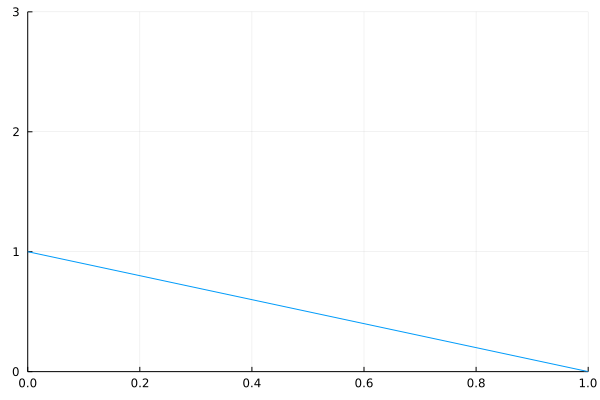

In [19]:
gif(anim, "nonlin_diff_el_200_300.gif", fps=30)

### Метод прямых

In [1]:
function u_init(x)
    return -x + 1
end

u_init (generic function with 1 method)

In [2]:
function u_left(t)
    return exp(-t)
end

u_left (generic function with 1 method)

In [110]:
function func(y, t, h, N)
    f = zeros(N)
    f[1] = -y[1] * (y[1] - u_left(t)) / h + exp(y[1] ^ 2)
    f[2:length(f)] = - y[2:length(f)] .* (y[2:length(f)] - y[1:length(f) - 1]) / h + exp.(y[2:length(f)] .^ 2)
    return f
end

func (generic function with 2 methods)

In [16]:
using LinearAlgebra

In [107]:
function func_y(y, t, h, N)
    f_y = zeros((N, N))
    f_y[1, 1] = (-2 * y[1] + u_left(t)) / h + 2 * y[1] * exp(y[1] ^ 2)
    f_y[diagind(f_y)[2:N]] = (-2 * y[2:N] + y[1:N-1]) / h + 2 * y[2:N] .* exp.(y[2:N] .^ 2)
    f_y[diagind(f_y, -1)] = y[2:N] / h
    return f_y
end

func_y (generic function with 1 method)

#### Задание переменных и начальных параметров

In [56]:
# Начальные значения
a = 0
b = 1
t_0 = 0
T = 0.3

0.3

In [58]:
# Коэффициент для одностадийного метода Розенброка
alpha = (1 + 1im) / 2
# Число узлов
N = 200
M = 300

300

In [59]:
# Cетка
t = LinRange(t_0, T, M + 1)
x = LinRange(a, b, N + 1);

In [60]:
# Размер шага сетки
h = (b - a) / N
tau = (T - t_0) / M

0.001

In [68]:
# Инициализация начальных значений
u = zeros(M + 1, N + 1)
y = zeros(M + 1, N)

u[1, :] = u_init.(x)
u[2:M + 1, 1] = u_left.(t[2:M + 1])
y[1, :] = u[1, 2:N+1];

#### Решение и визуализация

In [111]:
for m in tqdm(1:M)
    w_1 = (I - alpha * tau * func_y(y[m, :], t[m], h, N)) \ func(y[m, :], t[m] + tau / 2, h, N)
    y[m + 1, :] = y[m, :] + tau * real(w_1)
    u[m + 1, 2:N+1] = y[m + 1, :]
end

0.0%┣                                             ┫ 0/300 [00:00<00:-15, -0s/it]
0.3%┣▏                                         ┫ 1/300 [00:02<Inf:Inf, InfGs/it]
9.3%┣████▏                                        ┫ 28/300 [00:02<00:17, 16it/s]
22.3%┣█████████▉                                  ┫ 67/300 [00:02<00:06, 39it/s]
38.3%┣████████████████▌                          ┫ 115/300 [00:02<00:03, 65it/s]
53.0%┣██████████████████████▉                    ┫ 159/300 [00:02<00:02, 88it/s]
67.0%┣████████████████████████████▏             ┫ 201/300 [00:02<00:01, 108it/s]
81.0%┣██████████████████████████████████        ┫ 243/300 [00:02<00:00, 127it/s]
94.3%┣███████████████████████████████████████▋  ┫ 283/300 [00:02<00:00, 144it/s]
100.0%┣█████████████████████████████████████████┫ 300/300 [00:02<00:00, 151it/s]


In [114]:
anim = @animate for i in 1:length(t)
    plot(x, u[i, :], legend=false, xlims=(0, 1), ylims=(0, 3))
end

Animation("C:\\Users\\aleks\\AppData\\Local\\Temp\\jl_n8TfUk", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])

┌ Info: Saved animation to 
│   fn = C:\Users\aleks\Documents\Projects\Comp math\nonlin_lines_meth_200_300.gif
└ @ Plots C:\Users\aleks\.julia\packages\Plots\lW9ll\src\animation.jl:137


Plots.AnimatedGif("C:\\Users\\aleks\\Documents\\Projects\\Comp math\\nonlin_lines_meth_200_300.gif")
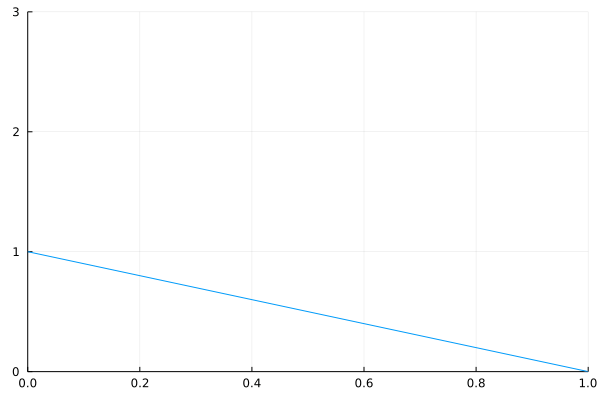

In [115]:
gif(anim, "nonlin_lines_meth_200_300.gif", fps=30)